# 2. Practical Part

## 1. Ridge Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt


class gradDescent():
    def __init__(self, weightedDecay = 0.01, stepSize = 0.01, numberSteps = 1000):
        self.weightedDecay = weightedDecay
        self.stepSize = stepSize
        self.numberSteps = numberSteps

    def ridge_regression(self, weight, bias, data, target):
        '''
        bias: 1d scalar
        weightedDecay: λ
        stepSize: η
        x: data
        t: target
        
        '''
        for i in range(0, self.numberSteps):
            #gradient of one data, randomly chosen
                index = np.random.randint(0, data.shape[0])
            
                grad = 1.0/(data[index]**2) * (data[index])* (bias-target[index])
                #regularization lambda
                regGrad = 2 * self.weightedDecay * weight[index]
                regGrad = regGrad + grad
                
                weight = weight - self.stepSize*regGrad
                
                biasGrad = 1.0/(data[index]**2) * (bias-target[index])
                bias = bias - self.stepSize*biasGrad
        return weight, bias


     

## 2. Draw Dn from h(x)

In [2]:
def hX(x):
    '''
    defines the target function
    '''
    return np.sin(x) + 0.3*x -1

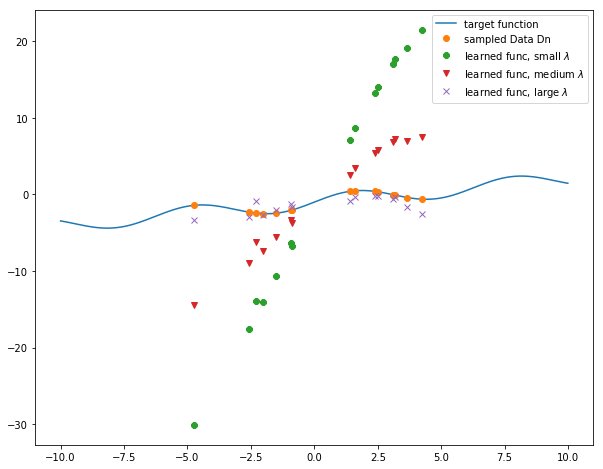

In [3]:
data = np.random.uniform(-5,5,15)
target = hX(data)
dataDn = [data, target]

#initialize weights
weight = np.random.rand(15)
#weight = np.random.rand(1)
bias = 0

#param holders
regGDsmallParam = []
regGDMedParam = []
regGDLargeParam = []

#Small lambda
regGDsmall = gradDescent(weightedDecay = 0.01, stepSize = 0.01)
regGDsmallParam = regGDsmall.ridge_regression(weight, bias, data, target)

regGDMed = gradDescent(weightedDecay = 0.1, stepSize = 0.01)
regGDMedParam = regGDMed.ridge_regression(weight, bias, data, target)

regGDLarge = gradDescent(weightedDecay = 1, stepSize = 0.01)
regGDLargeParam = regGDLarge.ridge_regression(weight, bias, data, target)

# learned functions
learnedFuncSmall = (regGDsmallParam[0] * data) + regGDsmallParam[1]
learnedFuncMed = (regGDMedParam[0] * data) + regGDMedParam[1]
learnedFuncLarge = (regGDLargeParam[0] * data) + regGDLargeParam[1]
#plot data function
xvals = np.arange(-10, 10, 0.01)
plt.rcParams['figure.figsize'] = [10, 8]

plt.plot(xvals, hX(xvals), label = "target function")
plt.plot(data, target, 'o', label="sampled Data Dn")
plt.plot(data, learnedFuncSmall, '8', label = "learned func, small $\lambda$")
plt.plot(data, learnedFuncMed, 'v', label = "learned func, medium $\lambda$")
plt.plot(data, learnedFuncLarge, 'x', label = "learned func, large $\lambda$")
plt.legend(loc='best')
plt.show()


##  3. Train without regularization, $\lambda$ = 0
Plot h(x), Dn, and our prediction function $f(X) = w^T X + b $

## 4. Part 3 revisited, with difference lamda values
Plot prediction with $W$ regularized by $\lambda$ $\lVert w \rVert^2$
Choose $\lambda$ intermediate and large

## 5. Sample $D_{test}$ from $h(X)$
Use $\lambda$ = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

Plot $\lambda$  on x-axis, avg((f(X) - target)^2)

## 6. Use kernel $\phi(x)$
set $\lambda = 0.01$

Try different degrees of polynomials


## 7. Comment on $l$, empirical risk ($D_n$), true risk($D_{test}$)